# Fabrica de Sillones - Costos de Producción
---

Una fábrica de sillones para oficinas dispone de la siguiente información mensual (enero/22, producción de 9.000 unidades):

- Salarios directos: $40.000  
- Cargas sociales salarios directos: $25.000  
- Fuerza motriz: $5.000  
- Depreciación: $4.000  
- Seguros: $2.000  
- Sueldos y cargas sociales supervisores: $10.000  
- Útiles de escritorio: $1.000  
- Lubricantes: $3.000  
- Repuestos y herramientas: $7.000  
- Salarios indirectos y cargas sociales: $20.000  

---

#### Importación de librerías

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches

#### Definición de datos

In [2]:
# Datos organizados por categorías
datos = {
    'MOD': {
        'Salarios directos': 40000,
        'Cargas sociales salarios directos': 25000
    },
    'CIF': {
        'Fuerza motriz': 5000,
        'Depreciación': 4000,
        'Seguros': 2000,
        'Sueldos y cargas sociales supervisores': 10000,
        'Útiles de escritorio': 1000,
        'Lubricantes': 3000,
        'Repuestos y herramientas': 7000,
        'Salarios indirectos y cargas sociales': 20000
    },
    'Otros': {
        'Unidades producidas': 9000
    }
}

#### Funciones auxiliares

In [3]:
# Función que calcula el total de una categoría específica
def total_categoria(nombre_categoria):
    return sum(datos[nombre_categoria].values())

In [4]:
# Función que crea un DataFrame con el detalle de una categoría

def detalle_categoria_df(nombre_categoria):
    df = pd.DataFrame(list(datos[nombre_categoria].items()),
                      columns=['Concepto', 'Monto ($)'])
    total = df['Monto ($)'].sum()
    total_row = pd.DataFrame([{'Concepto': 'TOTAL ' + nombre_categoria,
                               'Monto ($)': total}])
    return pd.concat([df, total_row], ignore_index=True) # Concatenar el detalle con la fila de total

#### Cálculos principales

In [6]:
# Calcular totales de categorías específicas
mod = total_categoria('MOD')  # Mano de Obra Directa
cif = total_categoria('CIF')  # Costos Indirectos de Fabricación

#### 1. Costo Primo Total (CP)
---

Se calcula como la **Mano de Obra Directa (MOD)**, ya que no se incluyen materiales directos distintos.  


\begin{align*}
\text{Costo Primo Total} &= \text{Salarios directos} + \text{Cargas sociales salarios directos} \\
\\
\end{align*}


In [31]:
# Cálculos de costos
costo_primo_total = mod  # Costo primo = MOD (no hay Materia Prima directa)


print("MOD detalle:")
for k,v in datos['MOD'].items():
    print(f"  {k}: ${v:,}")
print(f"MOD = {sum(datos['MOD'].values()):,}\n")

# Resultado final
print("💰 Resultado Final")
print("|                    Concepto |          Valor |")
print("|-----------------------------|----------------|")
print(f"| Materia Prima Directa (MP)  | $0             |")
print(f"| Mano de Obra Directa (MOD)  | ${mod:,}        |")
print(f"|        COSTO PRIMO TOTAL    |  ${mod:,}       |")
print("")


MOD detalle:
  Salarios directos: $40,000
  Cargas sociales salarios directos: $25,000
MOD = 65,000

💰 Resultado Final
|                    Concepto |          Valor |
|-----------------------------|----------------|
| Materia Prima Directa (MP)  | $0             |
| Mano de Obra Directa (MOD)  | $65,000        |
|        COSTO PRIMO TOTAL    |  $65,000       |



#### 2. Costo de Conversión Total (CC)
---

Se obtiene sumando la **MOD** más los **Costos Indirectos de Fabricación (CIF)**.  

\begin{align*}
\text{CIF} &= \sum \text{Costos Indirectos de Fabricación} \\
\\
\text{Costo de Conversión Total} &= \text{Mano de Obra Directa} + \text{CIF} \\
\end{align*}


In [29]:
cif = total_categoria('CIF')  # Costos Indirectos de Fabricación

print("CIF detalle:")
df_cif = detalle_categoria_df('CIF')
print(df_cif.to_string(index=False))

print("\n" + "="*50)

costo_conversion_total = mod + cif  # Costo de conversión = MOD + CIF
print(f"Costo de Conversión = {costo_conversion_total:,}")

CIF detalle:
                              Concepto  Monto ($)
                         Fuerza motriz       5000
                          Depreciación       4000
                               Seguros       2000
Sueldos y cargas sociales supervisores      10000
                  Útiles de escritorio       1000
                           Lubricantes       3000
              Repuestos y herramientas       7000
 Salarios indirectos y cargas sociales      20000
                             TOTAL CIF      52000

Costo de Conversión = 117,000


#### 3. Costo de producción total (CPT) de las unidades producidas
---

Dado que no hay materia prima directa, el costo de producción coincide con el costo de conversión. 

\begin{align*}
\text{Costo de Producción Total} &= \sout{\text{MPD}} + \text{MOD} + \text{CIF} \\
\end{align*}

\begin{align*}
\text{Costo de Producción Total} &= \text{MOD} + \text{CIF} \\
\end{align*}

\begin{align*}
\text{Costo de Producción Total} &= \text{Costo de Conversión Total} \\
\end{align*}

In [53]:
costo_produccion_total = costo_conversion_total

print("\n💰 Resultado Final:")
resultado_produccion = pd.DataFrame({
    'Concepto': ['Costo de Conversión', 'Costo de Producción'],
    'Valor ($)': [costo_conversion_total, costo_produccion_total],
    'Explicación': ['MOD + CIF', 'Igual al costo de conversión (no hay MP)']
})
print(resultado_produccion.to_string(index=False))

print(f"\n Costo de Producción Total: ${costo_produccion_total:,}")


💰 Resultado Final:
           Concepto  Valor ($)                              Explicación
Costo de Conversión     117000                                MOD + CIF
Costo de Producción     117000 Igual al costo de conversión (no hay MP)

 Costo de Producción Total: $117,000


#### Gráficos

In [55]:
# Configuración de estilo 
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Paleta de colores 
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A8EAE', '#F0F3BD']
mod_color = '#2E86AB'    # Azul 
cif_color = '#A23B72'    # Magenta elegante
accent_color = '#F18F01' # Naranja de acento

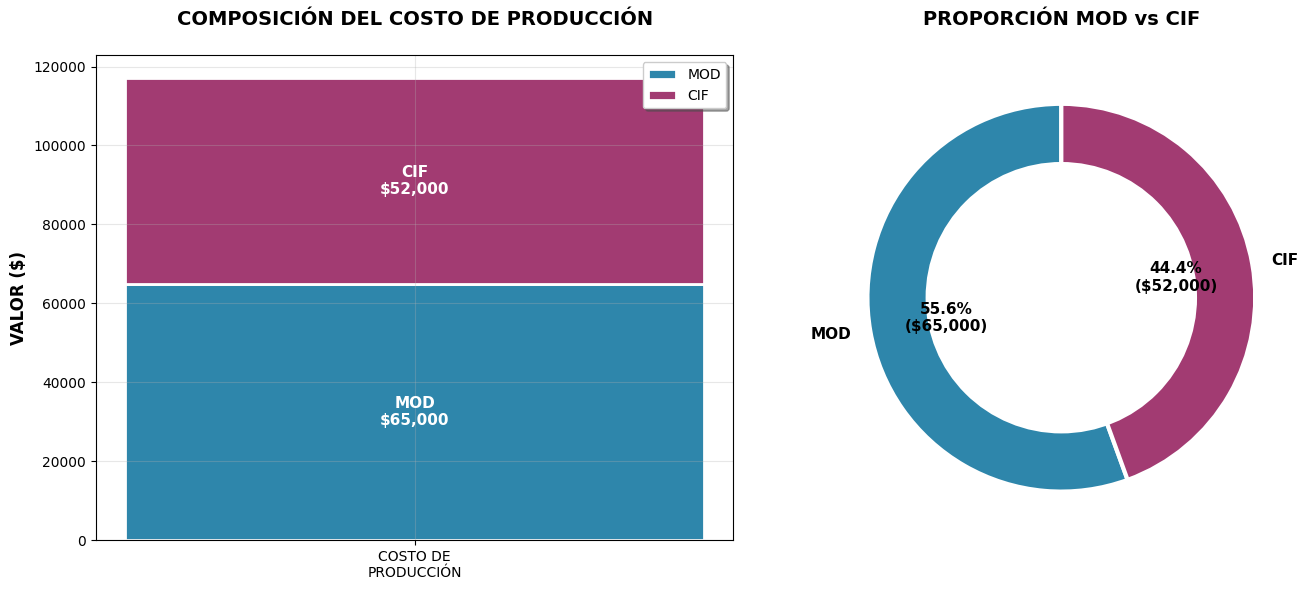

In [56]:
# GRÁFICO 1: Composición del Costo de Producción
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras apiladas
bars = ax1.bar(['COSTO DE\nPRODUCCIÓN'], [mod], 
               label='MOD', color=mod_color, edgecolor='white', linewidth=2)
ax1.bar(['COSTO DE\nPRODUCCIÓN'], [cif], bottom=[mod], 
        label='CIF', color=cif_color, edgecolor='white', linewidth=2)

ax1.set_ylabel('VALOR ($)', fontweight='bold', fontsize=12)
ax1.set_title('COMPOSICIÓN DEL COSTO DE PRODUCCIÓN\n', fontweight='bold', fontsize=14)
ax1.legend(loc='upper right', frameon=True, shadow=True)

# Añadir valores en las barras
ax1.text(0, mod/2, f'MOD\n${mod:,}', ha='center', va='center', 
         fontweight='bold', color='white', fontsize=11)
ax1.text(0, mod + cif/2, f'CIF\n${cif:,}', ha='center', va='center', 
         fontweight='bold', color='white', fontsize=11)

# Gráfico de donut
wedges, texts, autotexts = ax2.pie([mod, cif], 
                                   labels=['MOD', 'CIF'],
                                   autopct=lambda p: f'{p:.1f}%\n(${p*(mod +cif)/100:,.0f})',
                                   startangle=90, 
                                   colors=[mod_color, cif_color],
                                   wedgeprops={'edgecolor': 'white', 'linewidth': 3},
                                   textprops={'fontsize': 11, 'fontweight': 'bold'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
ax2.add_artist(centre_circle)
ax2.set_title('PROPORCIÓN MOD vs CIF\n', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

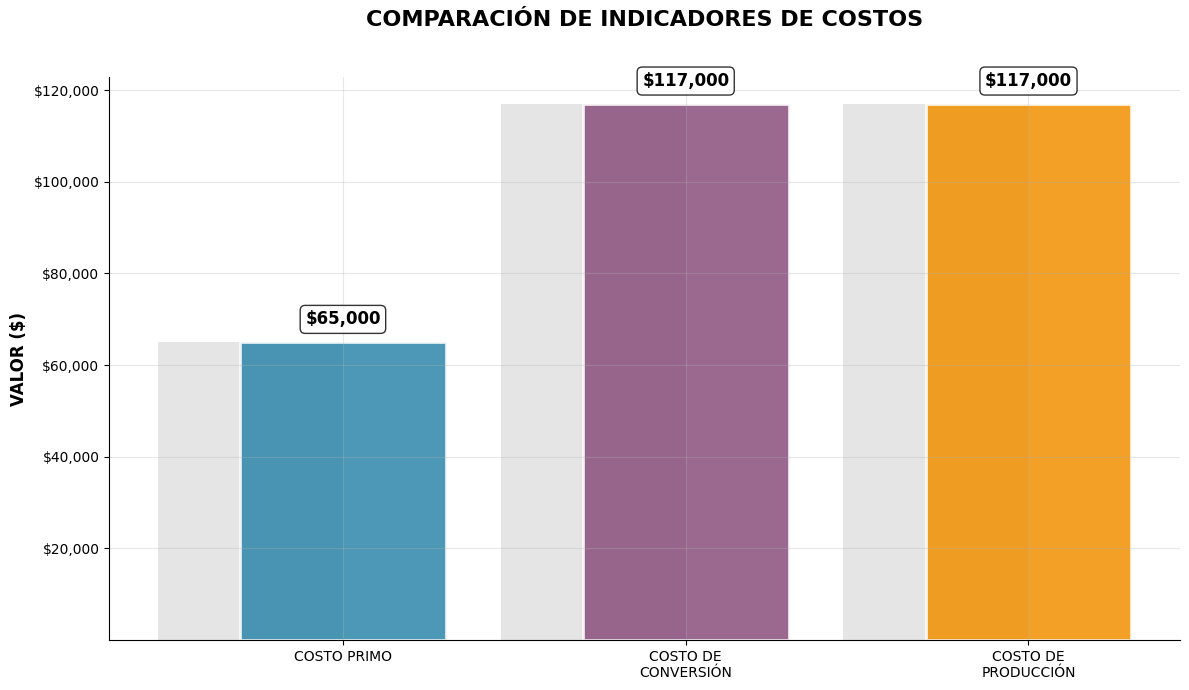

In [57]:
# GRÁFICO 2: Comparación de Costos Totales (3D EFFECT)
fig, ax = plt.subplots(figsize=(12, 7))

conceptos = ['COSTO PRIMO', 'COSTO DE\nCONVERSIÓN', 'COSTO DE\nPRODUCCIÓN']
valores = [costo_primo_total, costo_conversion_total, costo_produccion_total]

# Barras con efecto 3D
bars = ax.bar(conceptos, valores, 
              color=[mod_color, '#8A4F7D', '#F18F01'], 
              edgecolor='white', linewidth=2,
              alpha=0.85, 
              width=0.6)

# Efecto de sombra para 3D
for bar in bars:
    bar.set_zorder(1)
    bar.set_edgecolor('white')
    # Añadir sombra
    shadow = bar.get_xy()
    shadow_width = bar.get_width()
    shadow_height = bar.get_height()
    ax.bar(shadow[0] + 0.03, shadow_height, shadow_width - 0.06, 
            bottom=shadow[1] + 0.03, color='black', alpha=0.1, zorder=0)

ax.set_title('COMPARACIÓN DE INDICADORES DE COSTOS\n', fontweight='bold', fontsize=16, pad=20)
ax.set_ylabel('VALOR ($)', fontweight='bold', fontsize=12)

# Etiquetas
for bar, val in zip(bars, valores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 3000, 
            f'${val:,}', ha='center', va='bottom', 
            fontweight='bold', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Mejorar grid y ejes
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

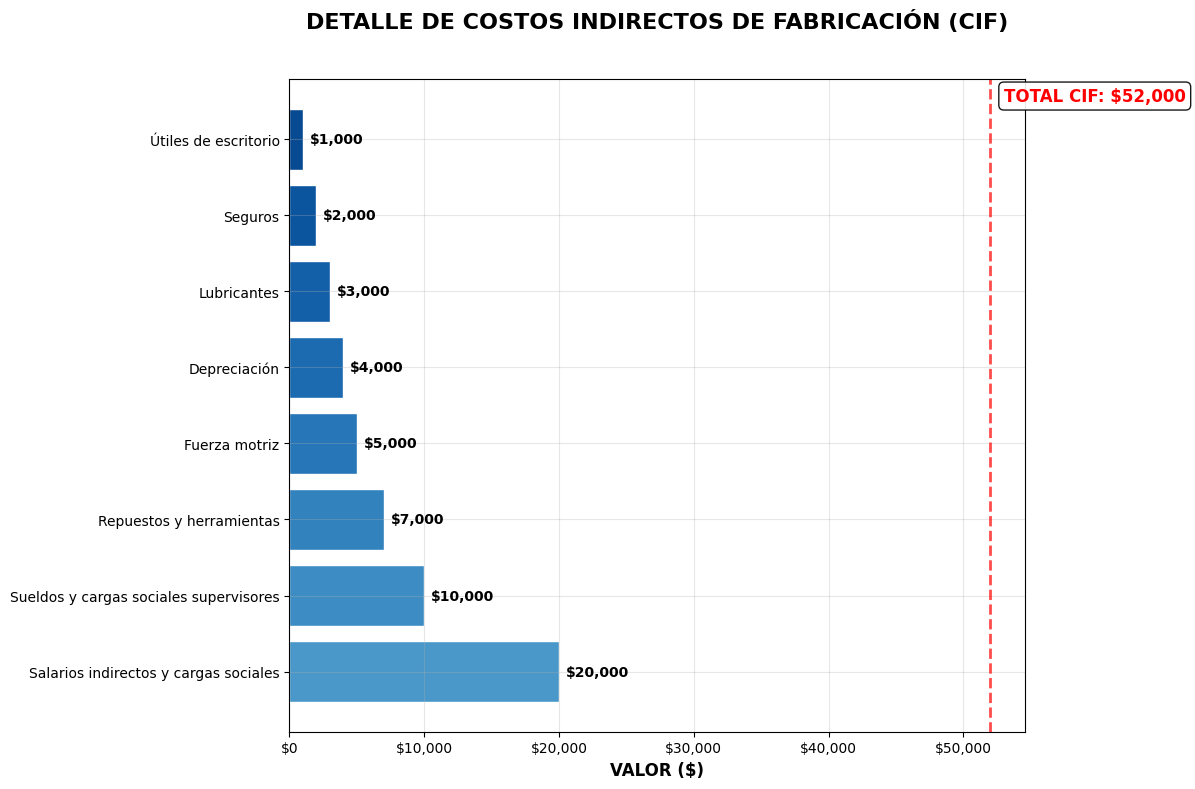

In [58]:
# GRÁFICO 3: Detalle CIF (Barras horizontales)
fig, ax = plt.subplots(figsize=(12, 8))

# Ordenar CIF por valor
cif_items = list(datos['CIF'].items())
cif_items.sort(key=lambda x: x[1], reverse=True)
conceptos = [item[0] for item in cif_items]
valores = [item[1] for item in cif_items]

# Crear colores degradados
colors_cif = cm.Blues(np.linspace(0.6, 0.9, len(conceptos)))

bars = ax.barh(conceptos, valores, color=colors_cif, edgecolor='white', linewidth=1)

ax.set_title('DETALLE DE COSTOS INDIRECTOS DE FABRICACIÓN (CIF)\n', 
             fontweight='bold', fontsize=16, pad=20)
ax.set_xlabel('VALOR ($)', fontweight='bold', fontsize=12)

# Añadir valores en las barras
for i, (bar, val) in enumerate(zip(bars, valores)):
    width = bar.get_width()
    ax.text(width + 500, bar.get_y() + bar.get_height()/2, 
            f'${val:,}', ha='left', va='center', 
            fontweight='bold', fontsize=10)

# Total CIF
ax.axvline(cif, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax.text(cif + 1000, len(conceptos)-0.5, 
        f'TOTAL CIF: ${cif:,}', 
        fontweight='bold', color='red', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9))

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

#### Exportación de resultados

In [52]:
# Exportar a Excel
with pd.ExcelWriter('resultados_actividad_3_refactor.xlsx') as writer:
    df_mod.to_excel(writer, sheet_name='Detalle_MOD', index=False)
    df_cif.to_excel(writer, sheet_name='Detalle_CIF', index=False)
    df_resumen.to_excel(writer, sheet_name='Resumen', index=False)
print("Exportado a 'resultados_actividad_3_refactor.xlsx'")

Exportado a 'resultados_actividad_3_refactor.xlsx'
